# Image Processing: Filtering

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# load image
FILENAME = "image.png"
img = cv2.imread(FILENAME, cv2.IMREAD_GRAYSCALE)
print(img.shape)

(4032, 3024)


## Filtering in Frequency Domain

In [3]:
def create_lines(height, img_height = 4032, img_width = 3024):
    # create multiple lines
    alternate = True
    output = np.zeros((img_height, img_width, 3), dtype = np.uint8)
    for i in range(0, img_height, height):
        if alternate:
            output[i:i + height, :, :] = 255
        alternate = not alternate

    return output

def create_grid(length, img_height = 4032, img_width = 3024):
    # create a grid
    alternate_col = True
    output = np.zeros((img_height, img_width, 3), dtype = np.uint8)
    for i in range(0, img_height, length):
        for j in range(0, img_width, length):
            if alternate_col:
                output[i:i + length, j:j + length, :] = 255
            alternate_col = not alternate_col

    return output

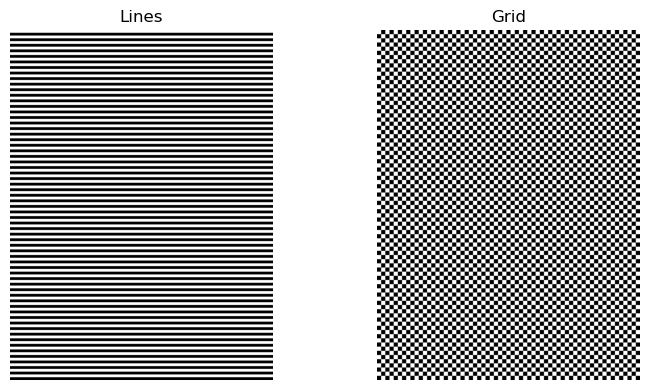

In [15]:
lines = cv2.cvtColor(create_lines(32), cv2.COLOR_RGB2GRAY)
grid = cv2.cvtColor(create_grid(48), cv2.COLOR_RGB2GRAY)

# show images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))
ax1.imshow(lines, cmap = "gray")
ax1.axis("off")
ax1.set_title("Lines")
ax2.imshow(grid, cmap = "gray")
ax2.axis("off")
ax2.set_title("Grid")
plt.tight_layout()
plt.show()

(4032, 3024)


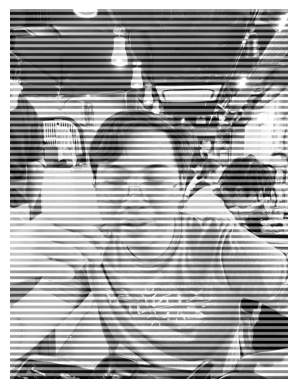

In [18]:
# add lines to image
img_degraded = cv2.addWeighted(img, 1, lines, 0.5, 0)
print(img_degraded.shape)
plt.imshow(img_degraded, cmap = "gray")
plt.axis("off")
plt.show()

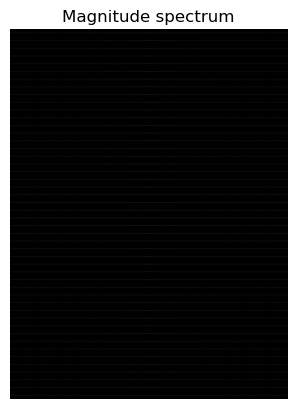

In [20]:
# apply Fourier transform
f = np.fft.fft2(grid)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 100000 * np.log(1 + np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap = "gray")
plt.title("Magnitude spectrum")
plt.axis("off")
plt.show()